## Quin Daly
## Math 436
## HW 3.3

In [40]:
import numpy as np
from matplotlib import pyplot as plt
from sympy import Symbol, Derivative
from sympy import sin

### Exercise 3.12

In [31]:
# define the runge-kutta method
def runge_kutta_2(f,deltaT,finalT,ini_val):
    
    # Initialize the domain and solution vector
    t_vals = np.linspace(0, finalT, int(np.floor(finalT/deltaT))+1)
    x = np.zeros(np.shape(t_vals))    
    x[0] = ini_val
    
    # Iterate through domain steps
    for ii in range(len(t_vals)):
        if ii > 0:
            x[ii] = x[ii - 1] + (deltaT/2)*(f(x[ii - 1])+f(x[ii - 1] + deltaT*f(x[ii-1])))
            
    return t_vals, x
   

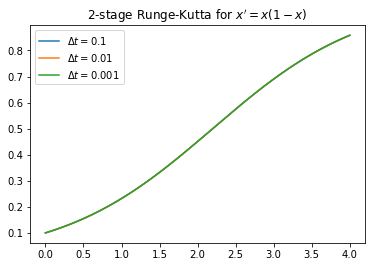

In [32]:
# plot the solution for different time steps
f = lambda x: x - x**2
deltas = [0.1,0.01,0.001]
finalT = 4.0
ini_val = 0.1
for dt in deltas:
    t_vals, x = runge_kutta_2(f,dt,finalT, ini_val)
    plt.plot(t_vals, x, label='$\u0394t=$' + str(dt))
    
plt.legend()
plt.title('2-stage Runge-Kutta for $x\'=x(1-x)$')
plt.show()

### Exercise 3.13

In [33]:
# define the 4-stage runge-kutta method
def runge_kutta_4(f,deltaT,finalT,ini_val):
    
    # Initialize the domain and solution vector
    t_vals = np.linspace(0, finalT, int(np.floor(finalT/deltaT))+1)
    x = np.zeros(np.shape(t_vals))    
    x[0] = ini_val
    
    # Iterate through domain steps
    for ii in range(len(t_vals)):
        if ii > 0:
            k0 = f(x[ii-1])
            k1 = f(x[ii-1] + (deltaT/2)*k0)
            k2 = f(x[ii-1] + (deltaT/2)*k1)
            k3 = f(x[ii-1] + deltaT*k2)
            x[ii] = x[ii - 1] + (deltaT/6)*(k0 + 2*k1 + 2*k2 + k3)
            
    return t_vals, x

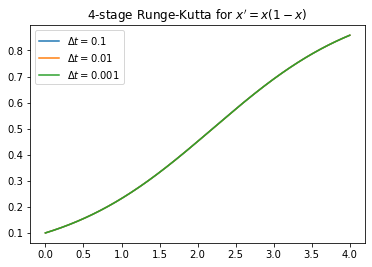

In [34]:
# plot the solution for different time steps
f = lambda x: x*(1-x)
deltas = [0.1,0.01,0.001]
finalT = 4.0
ini_val = 0.1
for dt in deltas:
    t_vals, x = runge_kutta_4(f,dt,finalT, ini_val)
    plt.plot(t_vals, x, label='$\u0394t=$' + str(dt))
    
plt.legend()
plt.title('4-stage Runge-Kutta for $x\'=x(1-x)$')
plt.show()

### Exercise 3.14

In [45]:
# Define taylor series method
def taylor(f,df,deltaT,finalT,ini_val):
    
    # Initialize the domain and solution vector
    t_vals = np.linspace(0, finalT, int(np.floor(finalT/deltaT))+1)
    x = np.zeros(np.shape(t_vals))    
    x[0] = ini_val
    
    # Iterate through domain steps
    for ii in range(len(t_vals)):
        if ii > 0:
            x[ii] = x[ii - 1] + (deltaT*f(x[ii-1])) + ((deltaT**2)/2)*f(x[ii-1])*df(x[ii-1])
            
    return t_vals, x

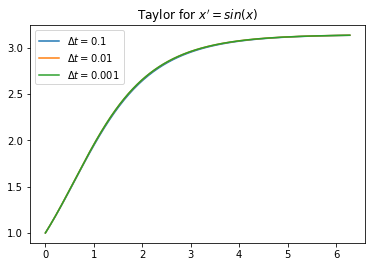

In [46]:
# plot the taylor series approx for f
f = lambda x: np.sin(x)
df = lambda x: np.cos(x)
deltas = [0.1,0.01,0.001]
finalT = 2*np.pi
ini_val = 1.0
for dt in deltas:
    t_vals, x = taylor(f,df,dt,finalT, ini_val)
    plt.plot(t_vals, x, label='$\u0394t=$' + str(dt))
    
plt.legend()
plt.title('Taylor for $x\'=sin(x)$')
plt.show()